# This notebook will combine the prediction bit and the optimisation bit to see how the algorithm perform

In [1]:
# Magic line to avoid explicitely write plt.show()
%matplotlib inline

In [143]:
#do not show warnings
import warnings
warnings.filterwarnings("ignore")

## First part : Optimisation for cluster #0 (just as a test)

In [3]:
import pandas as pd

In [5]:
sales_clusters_df=pd.read_csv('../data/raw/sales_cluster_table.csv')

sales_clusters_df['noisy_date']=pd.to_datetime(sales_clusters_df['noisy_date'])

In [6]:
# The library I created is called FaaS : Forecast as a Service
import FaaS

In [7]:
help(FaaS.print_msg)

Help on function print_msg in module FaaS:

print_msg(msg)



In [8]:
sales_clusters_df.head()

product_code noisy_date  noisy_quantity  Cluster
0         CLA0 2017-12-28     5038.619159        0
1         CLA0 2018-03-11     4658.195181        0
2         CLA0 2018-05-18     4676.433462        0
3         CLA0 2018-07-25     5067.550234        0
4         CLA0 2018-10-04     4602.628398        0

In [9]:
sales_clusters_df.rename(index=str,
                        columns={'product_code':'product'},inplace=True)

100%|██████████| 32/32 [00:01<00:00, 16.53it/s]


------------------------------
The workload is reduced by 40%
------------------------------


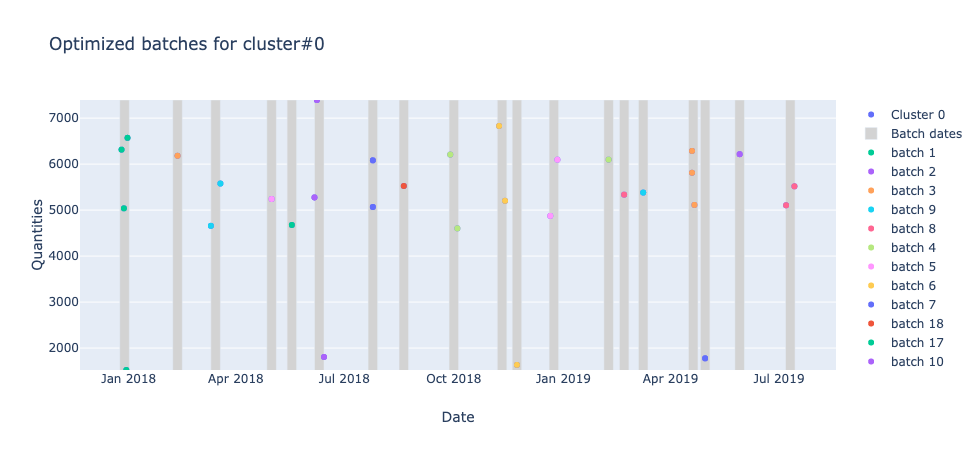

In [10]:
sales_cluster_0_optimization=FaaS.optimize_orders_processing(sales_clusters_df,0,'10 days')

In [11]:
sales_cluster_0_optimization.head()

noisy_quantity product  number_of_previous_neighbours  batch  \
noisy_date                                                                 
2017-12-26     6314.400966    CLB1                            1.0      1   
2017-12-28     5038.619159    CLA0                            2.0      1   
2017-12-30     1522.967281    CLD3                            3.0      1   
2017-12-31     6572.009204    CLC0                            4.0      1   
2018-02-11     6181.772772    CLB1                            1.0     11   

                    batch_date  
noisy_date                      
2017-12-26 2017-12-28 12:00:00  
2017-12-28 2017-12-28 12:00:00  
2017-12-30 2017-12-28 12:00:00  
2017-12-31 2017-12-28 12:00:00  
2018-02-11 2018-02-11 00:00:00

## Second part: Forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


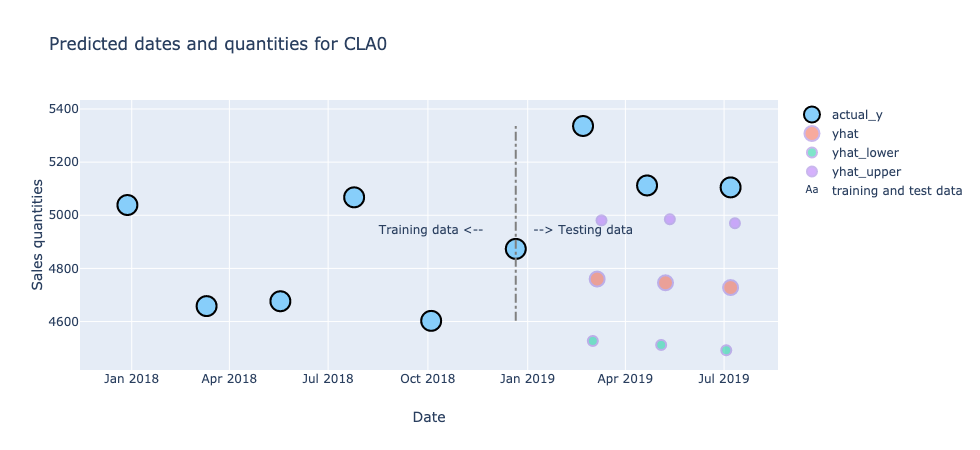

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


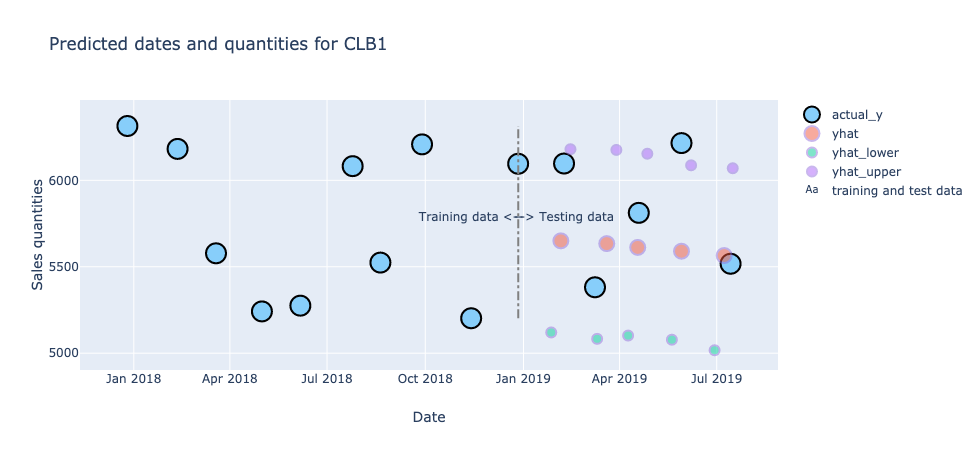

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


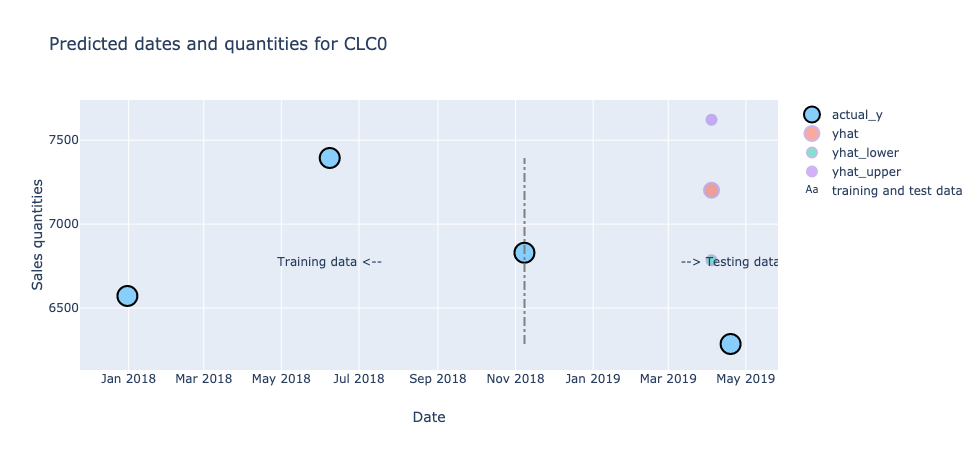

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


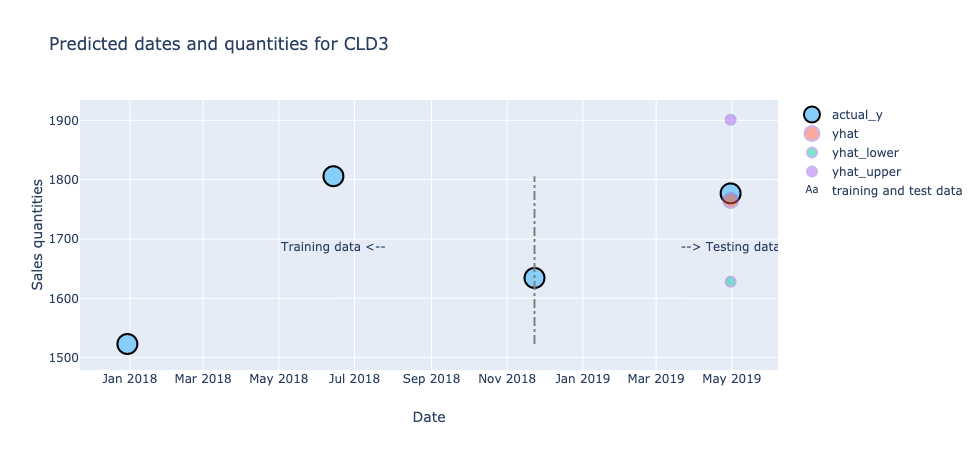

0
CLB1
1
CLC0
2
CLD3


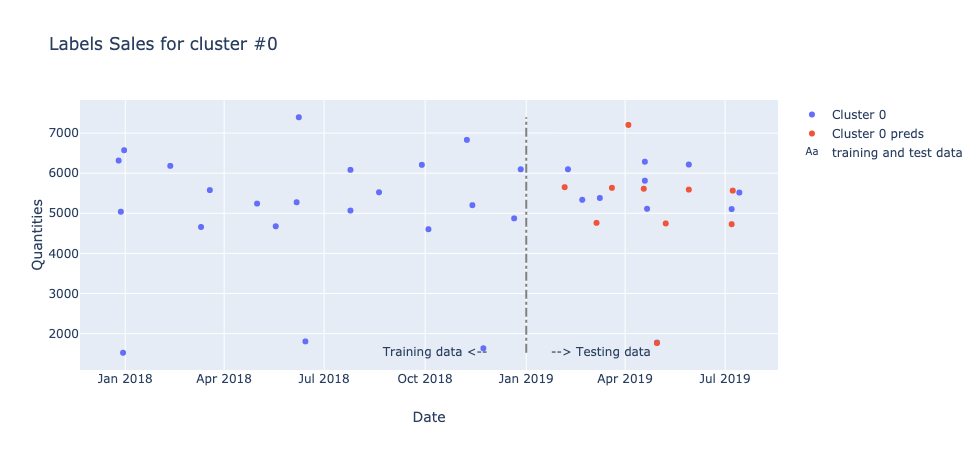

In [12]:
cluster_0_aggregated_preds=FaaS.get_aggregated_preds(sales_clusters_df,0,'2019-01-01')

# Now combining both!

In [13]:
#Forecast
cluster_0_aggregated_preds.head()

ds     yhat_qty  yhat_lower_qty  yhat_upper_qty  yhat_date  \
0 2017-12-28  4861.637512     4633.204712     5122.921593        NaT   
1 2018-03-11  4844.114412     4597.176618     5074.485529 2018-03-06   
2 2018-05-18  4827.791540     4597.344099     5048.967898 2018-05-20   
3 2018-07-25  4811.468679     4579.265377     5044.034467 2018-07-28   
4 2018-10-04  4794.425700     4554.121627     5030.339345 2018-10-05   

  yhat_lower_date yhat_upper_date            y product  
0             NaT             NaT  5038.619159    CLA0  
1      2018-03-02      2018-03-10  4658.195181    CLA0  
2      2018-05-16      2018-05-24  4676.433462    CLA0  
3      2018-07-24      2018-08-02  5067.550234    CLA0  
4      2018-10-01      2018-10-09  4602.628398    CLA0

In [14]:
#Optimization
sales_cluster_0_optimization.head()

noisy_quantity product  number_of_previous_neighbours  batch  \
noisy_date                                                                 
2017-12-26     6314.400966    CLB1                            1.0      1   
2017-12-28     5038.619159    CLA0                            2.0      1   
2017-12-30     1522.967281    CLD3                            3.0      1   
2017-12-31     6572.009204    CLC0                            4.0      1   
2018-02-11     6181.772772    CLB1                            1.0     11   

                    batch_date  
noisy_date                      
2017-12-26 2017-12-28 12:00:00  
2017-12-28 2017-12-28 12:00:00  
2017-12-30 2017-12-28 12:00:00  
2017-12-31 2017-12-28 12:00:00  
2018-02-11 2018-02-11 00:00:00

### Now trying to get the optimized predictions!

In [15]:
cluster_0_aggregated_preds.head()

ds     yhat_qty  yhat_lower_qty  yhat_upper_qty  yhat_date  \
0 2017-12-28  4861.637512     4633.204712     5122.921593        NaT   
1 2018-03-11  4844.114412     4597.176618     5074.485529 2018-03-06   
2 2018-05-18  4827.791540     4597.344099     5048.967898 2018-05-20   
3 2018-07-25  4811.468679     4579.265377     5044.034467 2018-07-28   
4 2018-10-04  4794.425700     4554.121627     5030.339345 2018-10-05   

  yhat_lower_date yhat_upper_date            y product  
0             NaT             NaT  5038.619159    CLA0  
1      2018-03-02      2018-03-10  4658.195181    CLA0  
2      2018-05-16      2018-05-24  4676.433462    CLA0  
3      2018-07-24      2018-08-02  5067.550234    CLA0  
4      2018-10-01      2018-10-09  4602.628398    CLA0

In [16]:
cluster_0_agg_preds=cluster_0_aggregated_preds.copy()

cluster_0_agg_preds=cluster_0_agg_preds.rename(index=str, columns={"yhat_date": "noisy_date",
                                                                  "yhat_qty": "noisy_quantity"})

cluster_0_agg_preds=cluster_0_agg_preds[~pd.isnull(cluster_0_agg_preds['noisy_date'])]

cluster_0_agg_preds['Cluster']=0

In [20]:
cluster_0_agg_preds.head()

ds  noisy_quantity  yhat_lower_qty  yhat_upper_qty noisy_date  \
1 2018-03-11     4844.114412     4597.176618     5074.485529 2018-03-06   
2 2018-05-18     4827.791540     4597.344099     5048.967898 2018-05-20   
3 2018-07-25     4811.468679     4579.265377     5044.034467 2018-07-28   
4 2018-10-04     4794.425700     4554.121627     5030.339345 2018-10-05   
5 2018-12-21     4775.702427     4536.007653     5014.997238 2018-12-17   

  yhat_lower_date yhat_upper_date            y product  Cluster  
1      2018-03-02      2018-03-10  4658.195181    CLA0        0  
2      2018-05-16      2018-05-24  4676.433462    CLA0        0  
3      2018-07-24      2018-08-02  5067.550234    CLA0        0  
4      2018-10-01      2018-10-09  4602.628398    CLA0        0  
5      2018-12-13      2018-12-21  4873.462946    CLA0        0

100%|██████████| 28/28 [00:02<00:00, 12.11it/s]


------------------------------
The workload is reduced by 25%
------------------------------


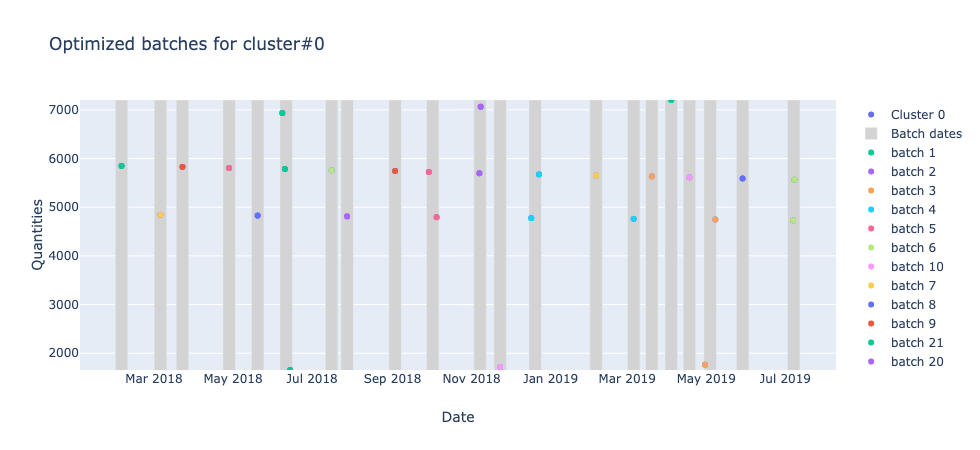

In [21]:
sales_cluster_0_optimized_preds=FaaS.optimize_orders_processing(cluster_0_agg_preds,0,'10 days')

In [22]:
sales_cluster_0_optimized_preds.head()

noisy_quantity product  number_of_previous_neighbours  batch  \
noisy_date                                                                 
2018-02-04     5848.283814    CLB1                            1.0     21   
2018-03-06     4844.114412    CLA0                            1.0     17   
2018-03-23     5828.596558    CLB1                            1.0      9   
2018-04-28     5805.081223    CLB1                            1.0     14   
2018-05-20     4827.791540    CLA0                            1.0     18   

           batch_date  
noisy_date             
2018-02-04 2018-02-04  
2018-03-06 2018-03-06  
2018-03-23 2018-03-23  
2018-04-28 2018-04-28  
2018-05-20 2018-05-20

In [23]:
def transform_the_optimized_df(sales_cluster_df,quantities):
    
    local_df=sales_cluster_df.reset_index()
    batch_dates_n_quantities_cluster=local_df.groupby('batch_date').sum()
    batch_dates_n_quantities_cluster['products_quantities_and_dates']=local_df.\
groupby('batch_date')[['product','noisy_quantity','noisy_date']].apply(lambda x: x.values.tolist())
    batch_dates_n_quantities_cluster=batch_dates_n_quantities_cluster[['noisy_quantity',
                                                                      'products_quantities_and_dates']]
    batch_dates_n_quantities_cluster.rename(index=str,
                                         columns={"noisy_quantity": quantities},
                                         inplace=True)
    
    return batch_dates_n_quantities_cluster

In [24]:
batch_dates_n_predicted_quantities_cluster_0=transform_the_optimized_df(sales_cluster_0_optimized_preds,
                                                                        "predicted_quantities")

In [25]:
batch_dates_n_predicted_quantities_cluster_0.head()

predicted_quantities  \
batch_date                                  
2018-02-04 00:00:00           5848.283814   
2018-03-06 00:00:00           4844.114412   
2018-03-23 00:00:00           5828.596558   
2018-04-28 00:00:00           5805.081223   
2018-05-20 00:00:00           4827.791540   

                                         products_quantities_and_dates  
batch_date                                                              
2018-02-04 00:00:00   [[CLB1, 5848.283814175213, 2018-02-04 00:00:00]]  
2018-03-06 00:00:00   [[CLA0, 4844.114412305247, 2018-03-06 00:00:00]]  
2018-03-23 00:00:00    [[CLB1, 5828.59655751704, 2018-03-23 00:00:00]]  
2018-04-28 00:00:00   [[CLB1, 5805.081223158414, 2018-04-28 00:00:00]]  
2018-05-20 00:00:00  [[CLA0, 4827.7915402883455, 2018-05-20 00:00:00]]

In [26]:
len(sales_cluster_0_optimized_preds['batch_date'].unique())

21

In [27]:
batch_dates_n_predicted_quantities_cluster_0.shape[0]

21

In [28]:
sales_cluster_0_optimization.head()

noisy_quantity product  number_of_previous_neighbours  batch  \
noisy_date                                                                 
2017-12-26     6314.400966    CLB1                            1.0      1   
2017-12-28     5038.619159    CLA0                            2.0      1   
2017-12-30     1522.967281    CLD3                            3.0      1   
2017-12-31     6572.009204    CLC0                            4.0      1   
2018-02-11     6181.772772    CLB1                            1.0     11   

                    batch_date  
noisy_date                      
2017-12-26 2017-12-28 12:00:00  
2017-12-28 2017-12-28 12:00:00  
2017-12-30 2017-12-28 12:00:00  
2017-12-31 2017-12-28 12:00:00  
2018-02-11 2018-02-11 00:00:00

In [29]:
batch_dates_n_quantities_cluster_0=transform_the_optimized_df(sales_cluster_0_optimization,'quantities')

In [30]:
batch_dates_n_quantities_cluster_0.head()

quantities  \
batch_date                          
2017-12-28 12:00:00  19447.996610   
2018-02-11 00:00:00   6181.772772   
2018-03-15 00:00:00  10236.085409   
2018-05-01 00:00:00   5241.655174   
2018-05-18 00:00:00   4676.433462   

                                         products_quantities_and_dates  
batch_date                                                              
2017-12-28 12:00:00  [[CLB1, 6314.400965995367, 2017-12-26 00:00:00...  
2018-02-11 00:00:00   [[CLB1, 6181.772772121883, 2018-02-11 00:00:00]]  
2018-03-15 00:00:00  [[CLA0, 4658.195180889406, 2018-03-11 00:00:00...  
2018-05-01 00:00:00     [[CLB1, 5241.6551738544, 2018-05-01 00:00:00]]  
2018-05-18 00:00:00   [[CLA0, 4676.433462461426, 2018-05-18 00:00:00]]

In [31]:
batch_dates_n_predicted_quantities_cluster_0.head()

predicted_quantities  \
batch_date                                  
2018-02-04 00:00:00           5848.283814   
2018-03-06 00:00:00           4844.114412   
2018-03-23 00:00:00           5828.596558   
2018-04-28 00:00:00           5805.081223   
2018-05-20 00:00:00           4827.791540   

                                         products_quantities_and_dates  
batch_date                                                              
2018-02-04 00:00:00   [[CLB1, 5848.283814175213, 2018-02-04 00:00:00]]  
2018-03-06 00:00:00   [[CLA0, 4844.114412305247, 2018-03-06 00:00:00]]  
2018-03-23 00:00:00    [[CLB1, 5828.59655751704, 2018-03-23 00:00:00]]  
2018-04-28 00:00:00   [[CLB1, 5805.081223158414, 2018-04-28 00:00:00]]  
2018-05-20 00:00:00  [[CLA0, 4827.7915402883455, 2018-05-20 00:00:00]]

In [35]:
batch_dates_n_quantities_cluster_0.reset_index(inplace=True)

batch_dates_n_predicted_quantities_cluster_0.reset_index(inplace=True)

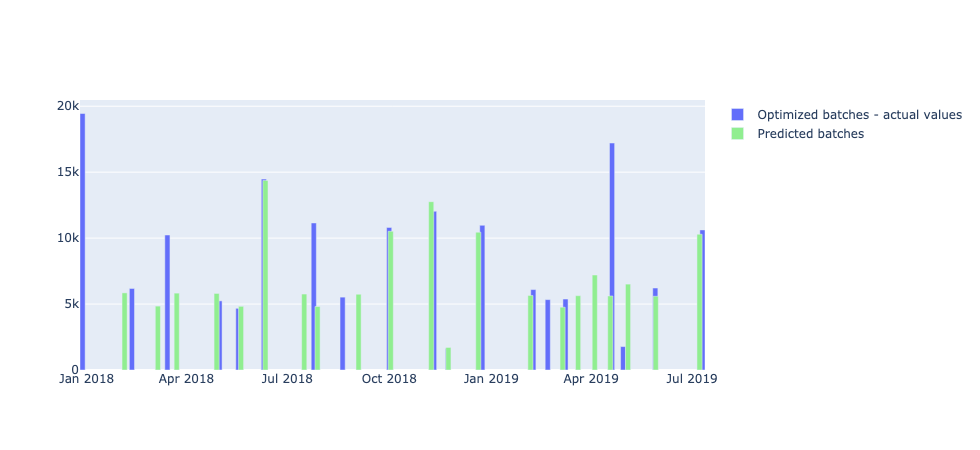

In [61]:
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Bar(x=batch_dates_n_quantities_cluster_0['batch_date'], 
             y=batch_dates_n_quantities_cluster_0['quantities'],
                    name='Optimized batches - actual values',
                    width=4*10e7))

fig.add_trace(go.Bar(x=batch_dates_n_predicted_quantities_cluster_0['batch_date'], 
             y=batch_dates_n_predicted_quantities_cluster_0['predicted_quantities'],
                    name='Predicted batches',
                    width=4*10e7,
                    marker_color='lightgreen'))

fig.show()

In [62]:
test_year='2019-01-01'

In [64]:
batch_dates_n_quantities_cluster_0[batch_dates_n_quantities_cluster_0['batch_date']>test_year]['batch_date']

12    2019-02-08 00:00:00
13    2019-02-21 00:00:00
14    2019-03-09 00:00:00
15    2019-04-20 00:00:00
16    2019-04-30 00:00:00
17    2019-05-29 00:00:00
18    2019-07-10 12:00:00
Name: batch_date, dtype: object

In [65]:
batch_dates_n_predicted_quantities_cluster_0[batch_dates_n_predicted_quantities_cluster_0['batch_date']>test_year]

batch_date  predicted_quantities  \
13  2019-02-05 00:00:00           5650.317568   
14  2019-03-06 00:00:00           4760.819826   
15  2019-03-20 00:00:00           5634.458395   
16  2019-04-04 00:00:00           7202.800358   
17  2019-04-18 00:00:00           5612.036806   
18  2019-05-04 00:00:00           6512.029553   
19  2019-05-29 00:00:00           5590.162086   
20  2019-07-07 12:00:00          10293.180276   

                        products_quantities_and_dates  
13   [[CLB1, 5650.317568010748, 2019-02-05 00:00:00]]  
14   [[CLA0, 4760.819825894745, 2019-03-06 00:00:00]]  
15   [[CLB1, 5634.458395355974, 2019-03-20 00:00:00]]  
16   [[CLC0, 7202.800358486253, 2019-04-04 00:00:00]]  
17  [[CLB1, 5612.0368064302575, 2019-04-18 00:00:00]]  
18  [[CLD3, 1765.3722024777815, 2019-04-30 00:00:0...  
19   [[CLB1, 5590.162085527121, 2019-05-29 00:00:00]]  
20  [[CLA0, 4728.174119686502, 2019-07-07 00:00:00...

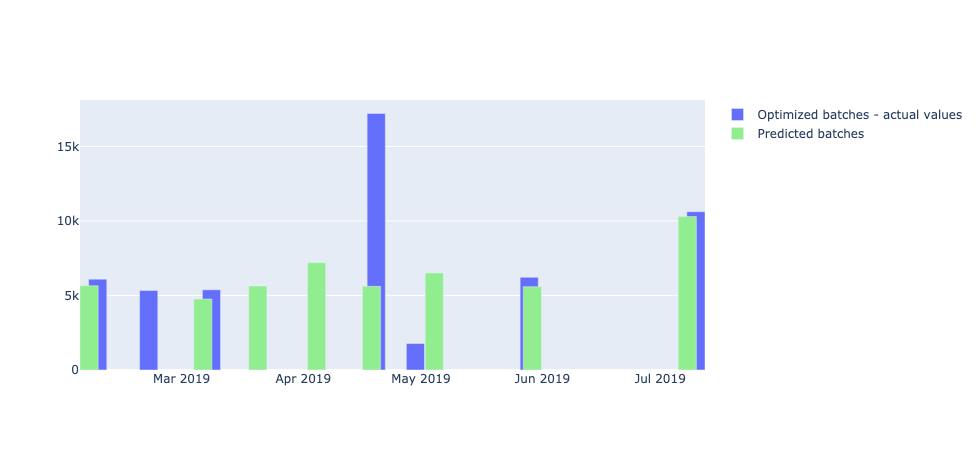

In [66]:
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Bar(x=batch_dates_n_quantities_cluster_0[batch_dates_n_quantities_cluster_0['batch_date']>test_year]['batch_date'], 
             y=batch_dates_n_quantities_cluster_0[batch_dates_n_quantities_cluster_0['batch_date']>test_year]['quantities'],
                    name='Optimized batches - actual values',
                    width=4*10e7))

fig.add_trace(go.Bar(x=batch_dates_n_predicted_quantities_cluster_0[batch_dates_n_predicted_quantities_cluster_0['batch_date']>test_year]['batch_date'], 
             y=batch_dates_n_predicted_quantities_cluster_0[batch_dates_n_predicted_quantities_cluster_0['batch_date']>test_year]['predicted_quantities'],
                    name='Predicted batches',
                    width=4*10e7,
                    marker_color='lightgreen'))

fig.show()

In [73]:
import numpy as np
total_predicted_quantities=np.sum(batch_dates_n_predicted_quantities_cluster_0['predicted_quantities'])
total_predicted_quantities

144537.6331748403

In [71]:
total_quantities=np.sum(batch_dates_n_quantities_cluster_0['quantities'])
total_quantities

165018.25098985137

In [75]:
100*(total_predicted_quantities/total_quantities)

87.58887717439774

# Make it a function:
-  Inputs:
  -  It should take 
    -  The original sales dataframe generated by the simulated data generator notebook,
    -  A cluster (a group of products with similar machine settings),
    -  A maximum waiting time (for optimization and batches generation),
    -  A test_date (to know what dat should be used to train the forecast models)
-  Outputs:
  - The graph comparing the best optimal batches (with the actual data if it is available) and the predicted batches with the predicted quantities over the actual quantities delta
  - The 2 dataframes :
    -  1 df with the optimal batches (dates, quantities, associated products and dates)
    -  1 df with the predicted batches (predicted dates, predicted quantities, associated products and associated dates)
  - The dates and quantities models if required

#### --> Inputs

In [77]:
import pandas as pd

In [167]:
sales_clusters_df=pd.read_csv('../data/raw/sales_cluster_table.csv')

sales_clusters_df['noisy_date']=pd.to_datetime(sales_clusters_df['noisy_date'])

In [76]:
cluster=0
max_waiting_time='10 days'
test_date='2019-01-01'

#### --> All the steps for the function

In [79]:
# The library I created is called FaaS : Forecast as a Service
import FaaS

In [168]:
sales_clusters_df.rename(index=str,
                        columns={'product_code':'product'},inplace=True)

In [82]:
FaaS.print_msg('Optimizing the actual data')

--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 32/32 [00:03<00:00, 10.38it/s]


------------------------------
The workload is reduced by 40%
------------------------------


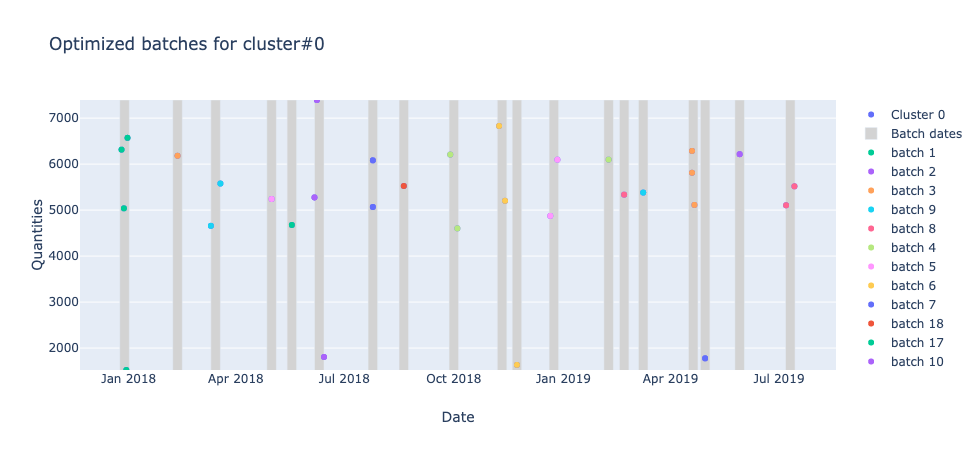

In [81]:
sales_cluster_optimization=FaaS.optimize_orders_processing(sales_clusters_df,cluster,max_waiting_time)

In [83]:
FaaS.print_msg('Creating and aggregating the Prophet/Sales forecasting models for cluster #{}'.format(cluster))

----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #0
----------------------------------------------------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


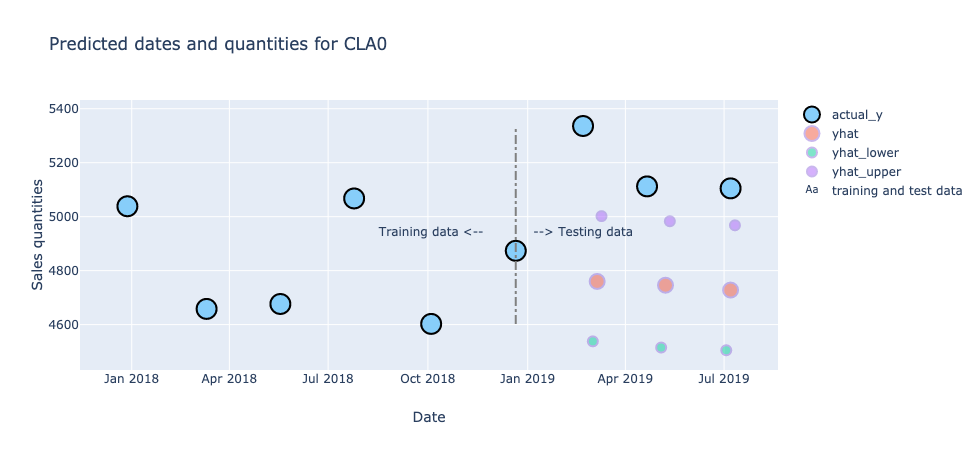

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


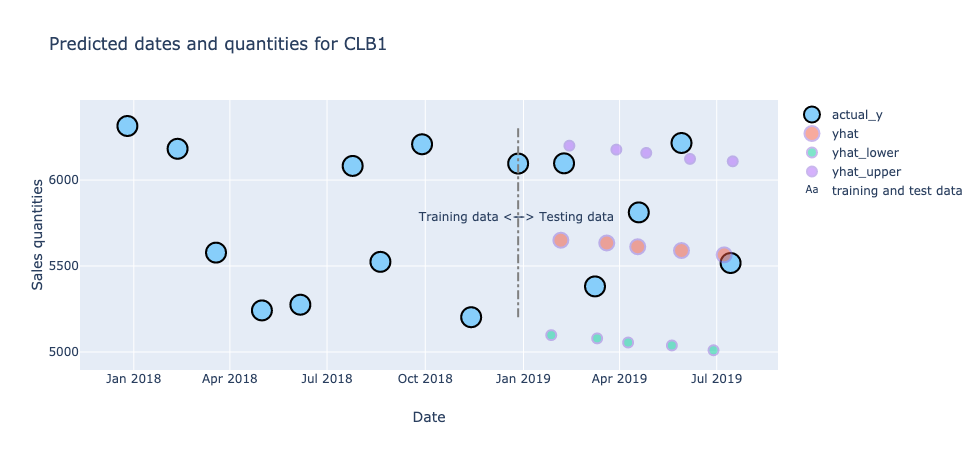

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


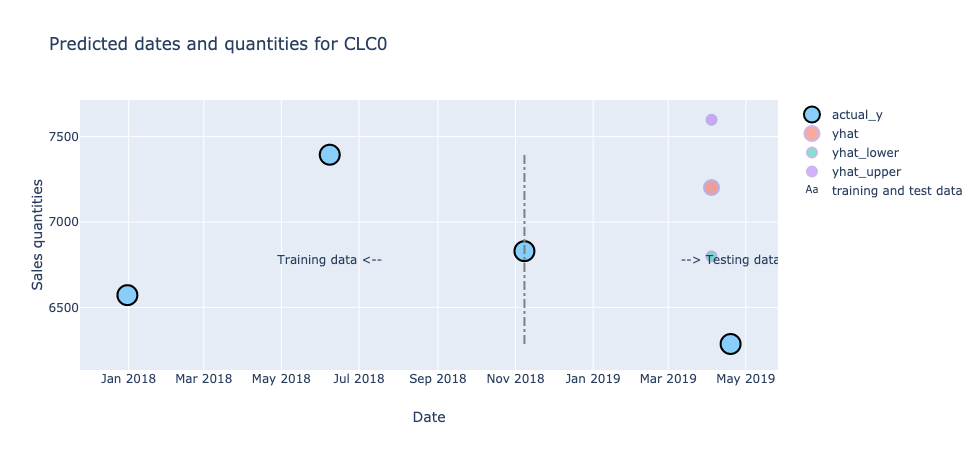

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


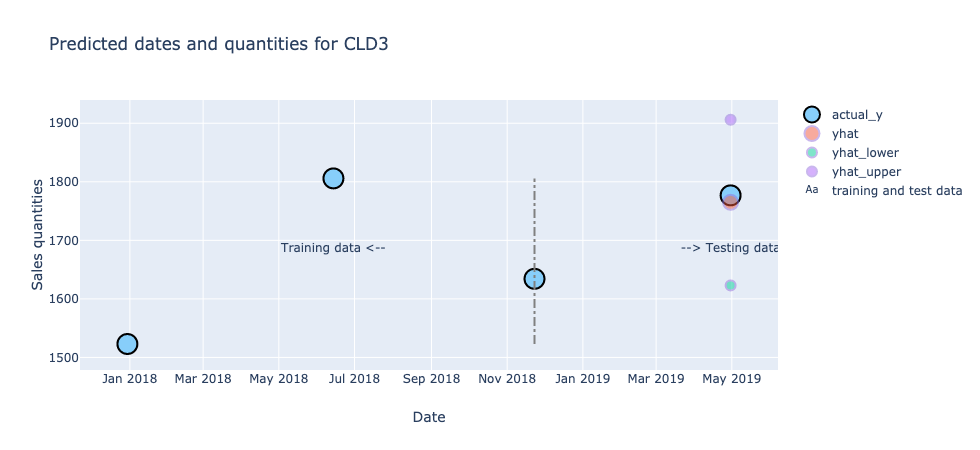

0
CLB1
1
CLC0
2
CLD3


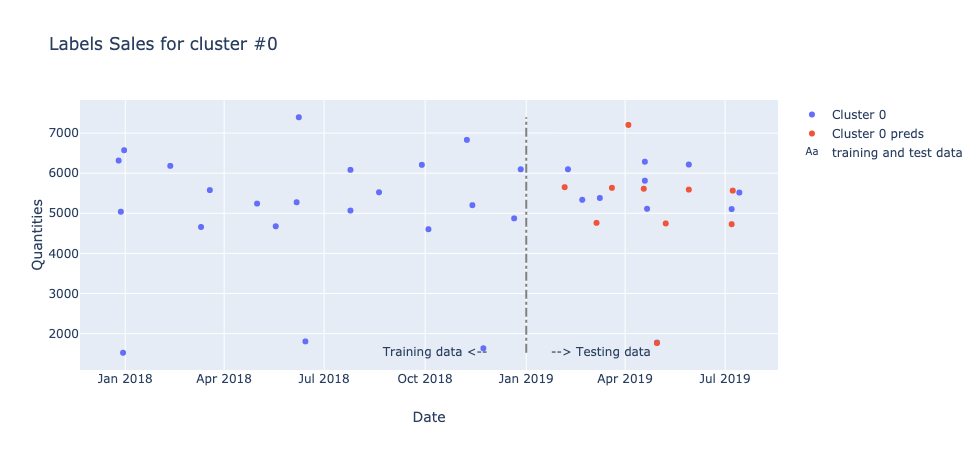

In [85]:
cluster_aggregated_preds=FaaS.get_aggregated_preds(sales_clusters_df,cluster,test_date)

In [88]:
cluster_aggregated_preds=cluster_aggregated_preds.rename(index=str, columns={"yhat_date": "noisy_date",
                                                                  "yhat_qty": "noisy_quantity"})

cluster_aggregated_preds=cluster_aggregated_preds[~pd.isnull(cluster_aggregated_preds['noisy_date'])]

cluster_aggregated_preds['Cluster']=cluster

100%|██████████| 28/28 [00:03<00:00,  8.74it/s]


------------------------------
The workload is reduced by 25%
------------------------------


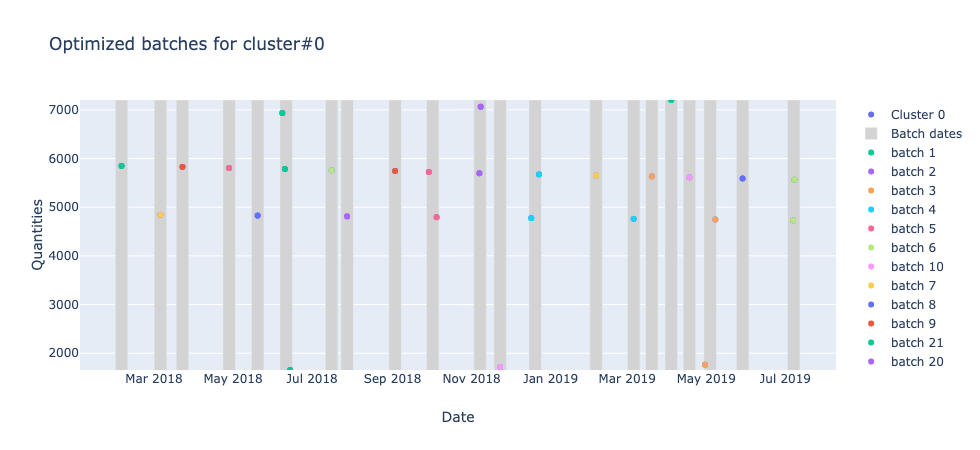

In [89]:
sales_cluster_optimized_preds=FaaS.optimize_orders_processing(cluster_agg_preds,cluster,max_waiting_time)

In [90]:
batch_dates_n_predicted_quantities_cluster=transform_the_optimized_df(sales_cluster_optimized_preds,
                                                                        "predicted_quantities")
batch_dates_n_quantities_cluster=transform_the_optimized_df(sales_cluster_optimization,'quantities')

batch_dates_n_quantities_cluster.reset_index(inplace=True)

batch_dates_n_predicted_quantities_cluster.reset_index(inplace=True)

In [93]:
test_year=test_date.split('-')[0]

In [116]:
import numpy as np
total_predicted_quantities=np.sum(batch_dates_n_predicted_quantities_cluster['predicted_quantities'])
total_predicted_quantities

144537.6331748403

In [115]:
total_quantities=np.sum(batch_dates_n_quantities_cluster['quantities'])
total_quantities

165018.25098985137

In [118]:
preds_coverage=100*(total_predicted_quantities/total_quantities)

In [125]:
FaaS.print_msg('The predicted quantities represent {:.1f}% of the actual quantities'.format(preds_coverage))

-----------------------------------------------------------------
The predicted quantities represent 87.6% of the actual quantities
-----------------------------------------------------------------


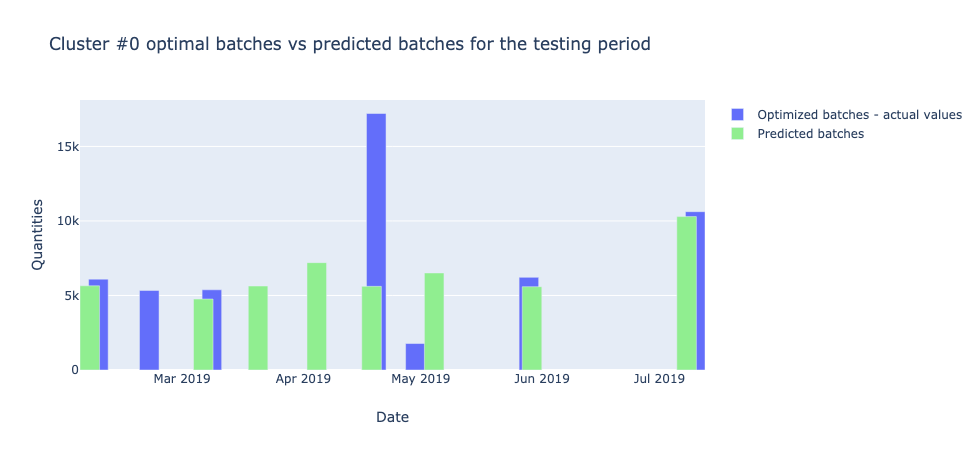

In [114]:
fig = go.Figure()

fig.add_trace(go.Bar(x=batch_dates_n_quantities_cluster[batch_dates_n_quantities_cluster['batch_date']>test_year]\
                     ['batch_date'], 
             y=batch_dates_n_quantities_cluster[batch_dates_n_quantities_cluster['batch_date']>test_year]\
                     ['quantities'],
                    name='Optimized batches - actual values',
                    width=1e3*pd.Timedelta(max_waiting_time).total_seconds()/2))

fig.add_trace(go.Bar(x=batch_dates_n_predicted_quantities_cluster[batch_dates_n_predicted_quantities_cluster['batch_date']>test_year]\
                     ['batch_date'], 
             y=batch_dates_n_predicted_quantities_cluster[batch_dates_n_predicted_quantities_cluster['batch_date']>test_year]\
                     ['predicted_quantities'],
                    name='Predicted batches',
                    width=1e3*pd.Timedelta(max_waiting_time).total_seconds()/2,
                    marker_color='lightgreen'))

# Edit the layout
fig.update_layout(title='Cluster #{} optimal batches vs predicted batches for the test period'.format(cluster),
                   xaxis_title='Date',
                   yaxis_title='Quantities')
fig.show()

In [140]:
def get_cluster_level_predicted_batches(sales_clusters_df,
                                       cluster,
                                       max_waiting_time='10 days',
                                       test_date='2019-01-01',
                                       detailed_view=False):
    
    
    '''
    This function is working at a cluster level: it takes a cluster and 
    predicts the batches for the test year, then it compares it with the actual data
    
    - Inputs:
        -  The original sales dataframe generated by the simulated data generator notebook,
        -  A cluster (a group of products with similar machine settings),
        -  A maximum waiting time (for optimization and batches generation),
        -  A test_date (to know what dat should be used to train the forecast models)
    -  Outputs:
        - The graph comparing the best optimal batches (with the actual data if it is available) and the predicted batches with the predicted quantities over the actual quantities delta
        - The 2 dataframes :
            -  1 df with the optimal batches (dates, quantities, associated products and dates)
            -  1 df with the predicted batches (predicted dates, predicted quantities, associated products and associated dates)
        - The dates and quantities models if required (WIP)
    '''
    
    sales_clusters_df.rename(index=str,
                        columns={'product_code':'product'},inplace=True)
    
    FaaS.print_msg('Optimizing the actual data')
    
    sales_cluster_optimization=FaaS.optimize_orders_processing(sales_clusters_df,
                                                               cluster,
                                                               max_waiting_time,
                                                              detailed_view)
    
    FaaS.print_msg('Creating and aggregating the Prophet/Sales forecasting models for cluster #{}'.format(cluster))
    
    cluster_aggregated_preds=FaaS.get_aggregated_preds(sales_clusters_df,cluster,test_date,detailed_view)
    
    cluster_aggregated_preds=cluster_aggregated_preds.rename(index=str, columns={"yhat_date": "noisy_date",
                                                                  "yhat_qty": "noisy_quantity"})

    cluster_aggregated_preds=cluster_aggregated_preds[~pd.isnull(cluster_aggregated_preds['noisy_date'])]

    cluster_aggregated_preds['Cluster']=cluster
    
    FaaS.print_msg('Optimizing the predicted data')
    
    sales_cluster_optimized_preds=FaaS.optimize_orders_processing(cluster_agg_preds,cluster,max_waiting_time,detailed_view)
    
    batch_dates_n_predicted_quantities_cluster=transform_the_optimized_df(sales_cluster_optimized_preds,
                                                                        "predicted_quantities")
    batch_dates_n_quantities_cluster=transform_the_optimized_df(sales_cluster_optimization,'quantities')

    batch_dates_n_quantities_cluster.reset_index(inplace=True)

    batch_dates_n_predicted_quantities_cluster.reset_index(inplace=True)
    
    test_year=test_date.split('-')[0]
    
    total_predicted_quantities=np.sum(batch_dates_n_predicted_quantities_cluster['predicted_quantities'])
    
    total_quantities=np.sum(batch_dates_n_quantities_cluster['quantities'])

    preds_coverage=100*(total_predicted_quantities/total_quantities)
    
    FaaS.print_msg('The predicted quantities represent {:.1f}% of the actual quantities'.format(preds_coverage))
    
    fig = go.Figure()

    fig.add_trace(go.Bar(x=batch_dates_n_quantities_cluster[batch_dates_n_quantities_cluster['batch_date']>test_year]\
                     ['batch_date'], 
             y=batch_dates_n_quantities_cluster[batch_dates_n_quantities_cluster['batch_date']>test_year]\
                     ['quantities'],
                    name='Optimized batches - actual values',
                    width=1e3*pd.Timedelta(max_waiting_time).total_seconds()/2))

    fig.add_trace(go.Bar(x=batch_dates_n_predicted_quantities_cluster[batch_dates_n_predicted_quantities_cluster['batch_date']>test_year]\
                     ['batch_date'], 
             y=batch_dates_n_predicted_quantities_cluster[batch_dates_n_predicted_quantities_cluster['batch_date']>test_year]\
                     ['predicted_quantities'],
                    name='Predicted batches',
                    width=1e3*pd.Timedelta(max_waiting_time).total_seconds()/2,
                    marker_color='lightgreen'))

    # Edit the layout
    fig.update_layout(title='Cluster #{} optimal batches vs predicted batches for the test period'.format(cluster),
                   xaxis_title='Date',
                   yaxis_title='Quantities')
    fig.show()
    
    return (batch_dates_n_quantities_cluster,
           batch_dates_n_predicted_quantities_cluster)

In [152]:
import importlib
importlib.reload(FaaS)

<module 'FaaS' from '/Users/raphaelribard/Documents/03_Clients/01_BailPrint/Sales_Forecasting/sales_forecasting/notebooks/FaaS.py'>

  0%|          | 0/32 [00:00<?, ?it/s]

--------------------------
Optimizing the actual data
--------------------------


100%|██████████| 32/32 [00:02<00:00, 11.43it/s]
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


------------------------------
The workload is reduced by 40%
------------------------------
----------------------------------------------------------------------------
Creating and aggregating the Prophet/Sales forecasting models for cluster #0
----------------------------------------------------------------------------


INFO:fbprophet:n_changepoints greater than number of observations.Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run pr

-----------------------------
Optimizing the predicted data
-----------------------------


100%|██████████| 28/28 [00:03<00:00,  9.02it/s]


------------------------------
The workload is reduced by 25%
------------------------------
-----------------------------------------------------------------
The predicted quantities represent 87.6% of the actual quantities
-----------------------------------------------------------------


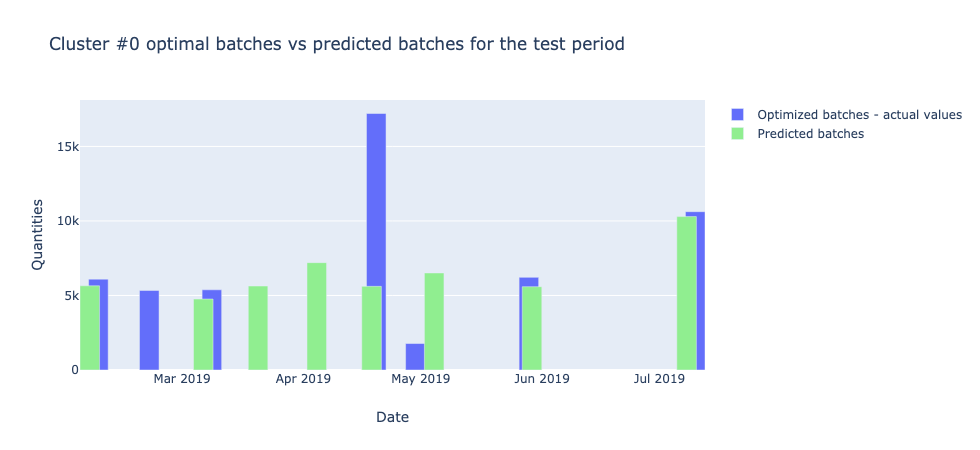

In [153]:
(batch_dates_n_quantities_cluster,
           batch_dates_n_predicted_quantities_cluster)=FaaS.get_cluster_level_predicted_batches(sales_clusters_df,
                                                                                          cluster)

In [159]:
batch_dates_n_quantities_cluster[batch_dates_n_quantities_cluster['quantities']>17000].iloc[1]['products_quantities_and_dates']

[['CLB1', 5811.909802552826, Timestamp('2019-04-19 00:00:00')],
 ['CLC0', 6285.941605442479, Timestamp('2019-04-19 00:00:00')],
 ['CLA0', 5112.239649877762, Timestamp('2019-04-21 00:00:00')]]

In [163]:
batch_dates_n_predicted_quantities_cluster.iloc[15]

batch_date                                                    2019-03-20 00:00:00
predicted_quantities                                                      5634.46
products_quantities_and_dates    [[CLB1, 5634.458395355974, 2019-03-20 00:00:00]]
Name: 15, dtype: object

In [172]:
sales_clusters_df[sales_clusters_df['product']=='CLB1']

product noisy_date  noisy_quantity  Cluster
17    CLB1 2017-12-26     6314.400966        0
18    CLB1 2018-02-11     6181.772772        0
19    CLB1 2018-03-19     5577.890228        0
20    CLB1 2018-05-01     5241.655174        0
21    CLB1 2018-06-06     5274.909501        0
22    CLB1 2018-07-25     6082.095754        0
23    CLB1 2018-08-20     5524.199876        0
24    CLB1 2018-09-28     6208.139346        0
25    CLB1 2018-11-13     5202.157894        0
26    CLB1 2018-12-27     6095.953714        0
27    CLB1 2019-02-08     6097.284359        0
28    CLB1 2019-03-09     5381.317226        0
29    CLB1 2019-04-19     5811.909803        0
30    CLB1 2019-05-29     6215.565413        0
31    CLB1 2019-07-14     5517.380754        0